In [2]:
import numpy as np
import pandas as pd
import statistics as stat
import sklearn.metrics as met
import matplotlib.pyplot as plt
import sklearn.neighbors as neighbors
from sklearn.naive_bayes import GaussianNB
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

In [3]:
# Part A
cols = ['ID', 'Outcome', 'Time',
        'Rad.1','Tex.1','Peri.1','Area.1','Smooth.1','Compact.1','Concavity.1','CP.1','Symm.1','FD.1',
        'Rad.2','Tex.2','Peri.2','Area.2','Smooth.2','Compact.2','Concavity.2','CP.2','Symm.2','FD.2',
        'Rad.3','Tex.3','Peri.3','Area.3','Smooth.3','Compact.3','Concavity.3','CP.3','Symm.3','FD.3',
        'TumorSize','LymphNodes']; 
WPBC = pd.read_csv("wpbc.data",names = cols);

print('1 : Mean Value')
print('2 : Standard Error')
print('3 : Mean of the three largest value')

WPBC.replace('N',0,inplace=True);
WPBC.replace('R',1,inplace=True);

WPBC.drop('ID', axis='columns',inplace=True)
WPBC.drop('Time', axis='columns',inplace=True)

1 : Mean Value
2 : Standard Error
3 : Mean of the three largest value


In [4]:
WPBC

,Outcome,Rad.1,Tex.1,Peri.1,Area.1,Smooth.1,Compact.1,Concavity.1,CP.1,Symm.1,...,Peri.3,Area.3,Smooth.3,Compact.3,Concavity.3,CP.3,Symm.3,FD.3,TumorSize,LymphNodes
0,0,18.02,27.60,117.50,1013.0,0.09489,0.10360,0.10860,0.07055,0.1865,...,139.70,1436.0,0.11950,0.1926,0.3140,0.11700,0.2677,0.08113,5.0,5
1,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,184.60,2019.0,0.16220,0.6656,0.7119,0.26540,0.4601,0.11890,3.0,2
2,0,21.37,17.44,137.50,1373.0,0.08836,0.11890,0.12550,0.08180,0.2333,...,159.10,1949.0,0.11880,0.3449,0.3414,0.20320,0.4334,0.09067,2.5,0
3,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,98.87,567.7,0.20980,0.8663,0.6869,0.25750,0.6638,0.17300,2.0,0
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,152.20,1575.0,0.13740,0.2050,0.4000,0.16250,0.2364,0.07678,3.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,0,22.52,21.92,146.90,1597.0,0.07592,0.09162,0.06862,0.06367,0.1728,...,162.10,1902.0,0.08191,0.1319,0.1056,0.09378,0.2061,0.05788,6.0,2
194,0,15.44,31.18,101.00,740.4,0.09399,0.10620,0.13750,0.06500,0.1735,...,112.60,929.0,0.12720,0.2362,0.2975,0.12860,0.2914,0.08024,1.5,0
195,0,17.17,29.19,110.00,915.3,0.08952,0.06655,0.06583,0.05068,0.1793,...,132.50,1295.0,0.12610,0.1572,0.2141,0.09520,0.3362,0.06033,3.7,0
196,1,21.42,22.84,145.00,1440.0,0.10700,0.19390,0.23800,0.13180,0.1884,...,198.30,2375.0,0.14980,0.4379,0.5411,0.22150,0.2832,0.08981,3.0,?


In [5]:
# Part B
non_recurrent_cases = WPBC[WPBC["Outcome"] == 0].iloc[:130]
recurrent_cases = WPBC[WPBC["Outcome"] == 1].iloc[:37]
record_197 = pd.DataFrame([WPBC.iloc[196]])
train_set = pd.concat([non_recurrent_cases, recurrent_cases, record_197])
test_set = WPBC.drop(train_set.index)

X_train = train_set.drop(columns=["Outcome"])
y_train = train_set["Outcome"]

X_test = test_set.drop(columns=["Outcome"])
y_test = test_set["Outcome"]

In [6]:
# Part C
lymph_feature = "LymphNodes"

WPBC.replace("?", np.nan, inplace=True)
X_train[lymph_feature] = pd.to_numeric(X_train[lymph_feature], errors="coerce")

lymph_median = X_train[lymph_feature].median()
X_train[lymph_feature].fillna(lymph_median, inplace=True)

In [7]:
# Part D (i) Naive Bayes' Classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

y_train_pred = nb_classifier.predict(X_train)
y_test_pred = nb_classifier.predict(X_test)

y_train_prob = nb_classifier.predict_proba(X_train)[:, 1]
y_test_prob = nb_classifier.predict_proba(X_test)[:, 1]

Confusion Matrix (Train):
 [[98 32]
 [20 18]]
Confusion Matrix (Test):
 [[14  7]
 [ 6  3]]


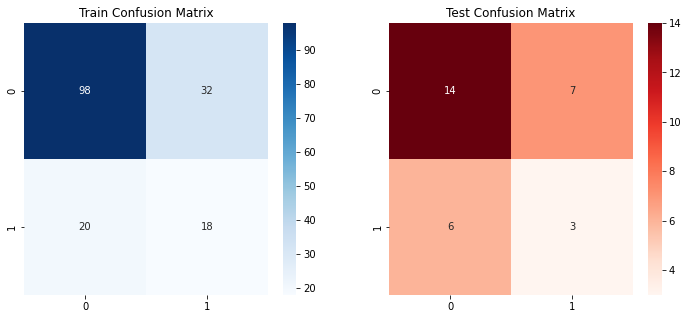

Classification Report (Train):
               precision    recall  f1-score   support

           0       0.83      0.75      0.79       130
           1       0.36      0.47      0.41        38

    accuracy                           0.69       168
   macro avg       0.60      0.61      0.60       168
weighted avg       0.72      0.69      0.70       168

Classification Report (Test):
               precision    recall  f1-score   support

           0       0.70      0.67      0.68        21
           1       0.30      0.33      0.32         9

    accuracy                           0.57        30
   macro avg       0.50      0.50      0.50        30
weighted avg       0.58      0.57      0.57        30



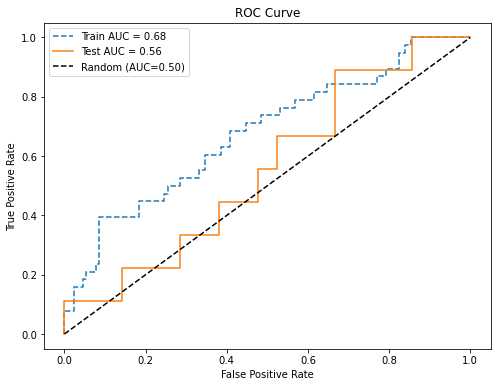

Train AUC: 0.68
Test AUC: 0.56


In [8]:
# Part D (i)
# Confusion Matrix

train_cm = confusion_matrix(y_train, y_train_pred)
test_cm = confusion_matrix(y_test, y_test_pred)

print("Confusion Matrix (Train):\n", train_cm)
print("Confusion Matrix (Test):\n", test_cm)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(train_cm, annot=True, fmt='d', cmap='Blues', ax=axes[0])
sns.heatmap(test_cm, annot=True, fmt='d', cmap='Reds', ax=axes[1])
axes[0].set_title("Train Confusion Matrix")
axes[1].set_title("Test Confusion Matrix")
plt.show()

# 
print("Classification Report (Train):\n", classification_report(y_train, y_train_pred))
print("Classification Report (Test):\n", classification_report(y_test, y_test_pred))

# ROC & AUC
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_prob)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob)

auc_train = auc(fpr_train, tpr_train)
auc_test = auc(fpr_test, tpr_test)

plt.figure(figsize=(8,6))
plt.plot(fpr_train, tpr_train, label=f'Train AUC = {auc_train:.2f}', linestyle='--')
plt.plot(fpr_test, tpr_test, label=f'Test AUC = {auc_test:.2f}', linestyle='-')
plt.plot([0, 1], [0, 1], 'k--', label="Random (AUC=0.50)")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

print(f"Train AUC: {auc_train:.2f}")
print(f"Test AUC: {auc_test:.2f}")
